Alumno: Luciano Benjamin Recalde Carballo
# Analisis y Prediccion de Precios de Autos

Cargamos los datos

In [9]:
import pandas as pd
ds_path = "data/Automobile_data.csv"
df = pd.read_csv(ds_path)

Revisamos la estructura de los mismos.

Iniciamos con la cabecera

In [10]:
#Revisamos la estructura del dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Las últimas filas

In [11]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
def isfloat(num): #esta función verifica si el valoor ingresado es de tipo float
    try:
        float(num)
        return True
    except ValueError:
        return False
def isInt(num): #esta función verifica si el valoor ingresado es de tipo float
    try:
        int(num)
        return True
    except ValueError:
        return False
cantidad = 0
finvalido = []
for i in range(len(df)):
    if (not isfloat(df.iloc[i,25]) and not isInt(df.iloc[i,25])): # se verifica si es float y en caso de no serlo, se visualiza para evaluar cómo repararlo
        print("El valor de la fila ", i ," columna TotalCharges es [", df.iloc[i,25], "]")
        cantidad += 1
        finvalido.append(i)
print("Se encontraron ", cantidad, "valores inválidos en las filas ,", finvalido)

El valor de la fila  9  columna TotalCharges es [ ? ]
El valor de la fila  44  columna TotalCharges es [ ? ]
El valor de la fila  45  columna TotalCharges es [ ? ]
El valor de la fila  129  columna TotalCharges es [ ? ]
Se encontraron  4 valores inválidos en las filas , [9, 44, 45, 129]


Guardamos los valores de precio desconocidos y los eliminamos de nuestro dataframe

In [14]:
df_price_unknown = df[df['price'] == '?']
df.drop(df[df['price'] == '?'].index, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Ahora volvemos a verificar

In [15]:
cantidad = 0
finvalido = []
for i in range(len(df)):
    if (not isfloat(df.iloc[i,25]) and not isInt(df.iloc[i,25])): # se verifica si es float y en caso de no serlo, se visualiza para evaluar cómo repararlo
        print("El valor de la fila ", i ," columna TotalCharges es [", df.iloc[i,25], "]")
        cantidad += 1
        finvalido.append(i)
print("Se encontraron ", cantidad, "valores inválidos en las filas ,", finvalido)

Se encontraron  0 valores inválidos en las filas , []


In [16]:
from utils import check_if_column_is_numeric
for col in df.columns:
    check_if_column_is_numeric(df, col)


Valores inválidos en la columna symboling 

El valor de la fila [126], columna [symboling] es [?]
El valor de la fila [127], columna [symboling] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna normalized-losses 

El valor de la fila [126], columna [normalized-losses] es [?]
El valor de la fila [127], columna [normalized-losses] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna make 



El valor de la fila [126], columna [make] es [?]
El valor de la fila [127], columna [make] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna fuel-type 

El valor de la fila [126], columna [fuel-type] es [?]
El valor de la fila [127], columna [fuel-type] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna aspiration 

El valor de la fila [126], columna [aspiration] es [?]
El valor de la fila [127], columna [aspiration] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna num-of-doors 

El valor de la fila [126], columna [num-of-doors] es [?]
El valor de la fila [127], columna [num-of-doors] es [?]
Se encontraron  2 valores inválidos en las filas , [126, 127]

Valores inválidos en la columna body-style 

El valor de la fila [126], columna [body-style] es [?]
El valor de la fila [127], columna [body-style] es [?]
Se encontraron  2 valores i

Utilizamos una funcion para describir las estructura de los datos

In [17]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Graficamos histogramas para visualizar la distribución de nuestras columnas

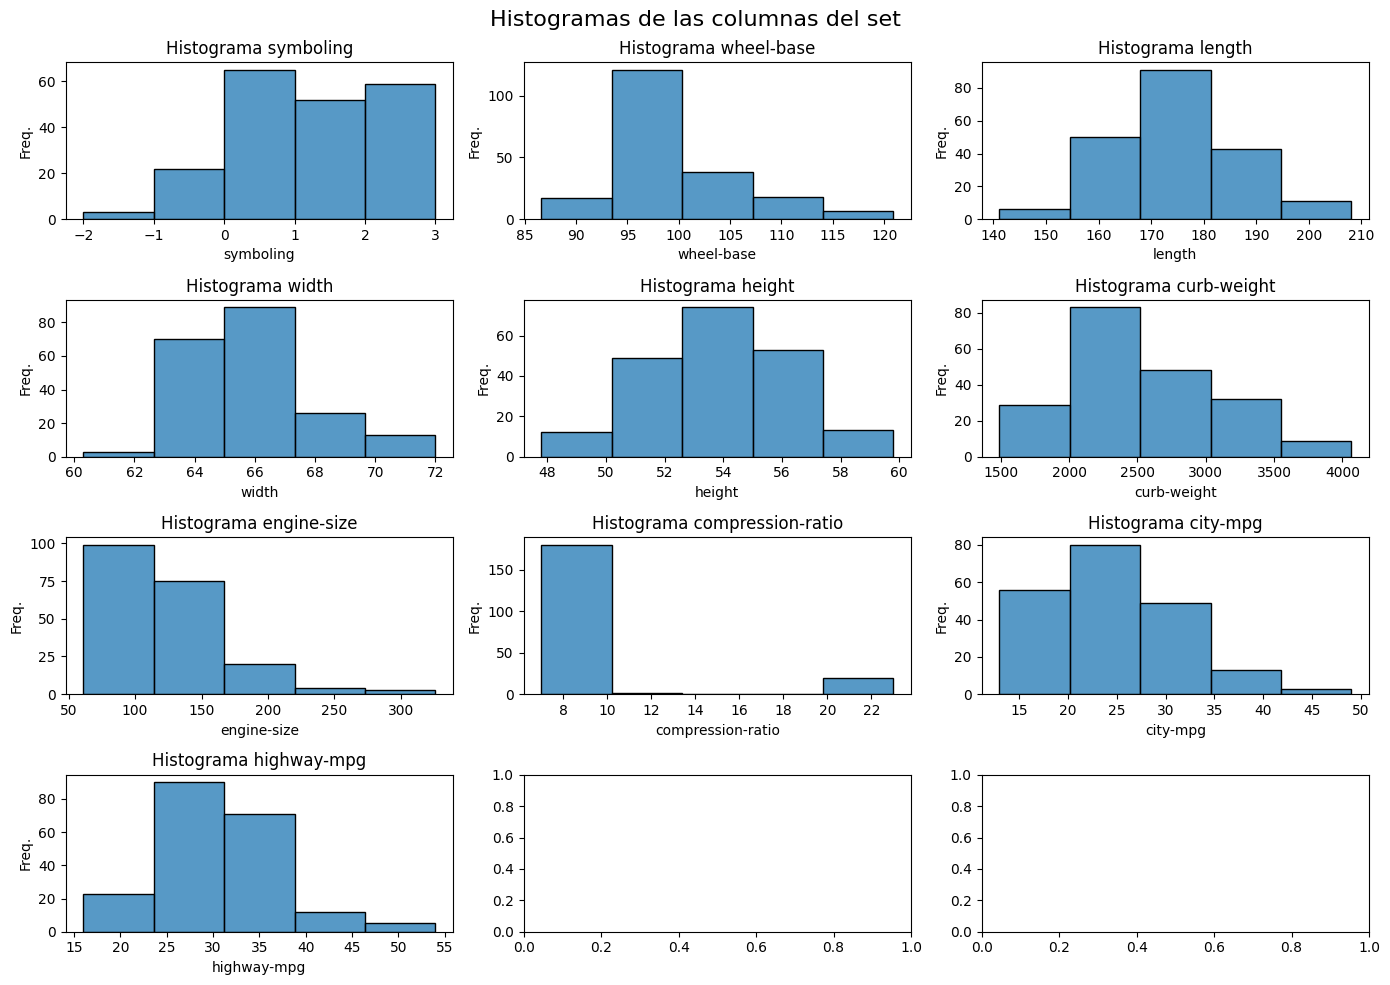

In [18]:
from utils import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), title="Histogramas de las columnas del set")

Ahora buscamos valores nulos en el dataframe

In [19]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
symboling,201,0,0.0
normalized-losses,201,0,0.0
make,201,0,0.0
fuel-type,201,0,0.0
aspiration,201,0,0.0
num-of-doors,201,0,0.0
body-style,201,0,0.0
drive-wheels,201,0,0.0
engine-location,201,0,0.0
wheel-base,201,0,0.0


No encontramos valores nulos en nuestro dataset

Ahora buscamos valores duplicados

In [20]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No existen valores duplicados.

Ahora veremos si existen outliers y los analizaremos en caso de que hayan

In [21]:
from utils import get_outliers_data
get_outliers_data(df)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
N° Outliers,0.0,3.000000,1.000000,11.000000,0.00,2.000000,10.000000,27.000000,2.000000,3.000000
% Outliers,0.0,1.492537,0.497512,5.472637,0.00,0.995025,4.975124,13.432836,0.995025,1.492537
Lim. mix,-3.0,82.650000,141.750000,60.350000,46.75,1033.500000,33.500000,7.400000,2.500000,11.500000
Lim. max,5.0,114.250000,208.550000,70.350000,60.75,4061.500000,205.500000,10.600000,46.500000,47.500000


Graficamos los botplox para contrastar

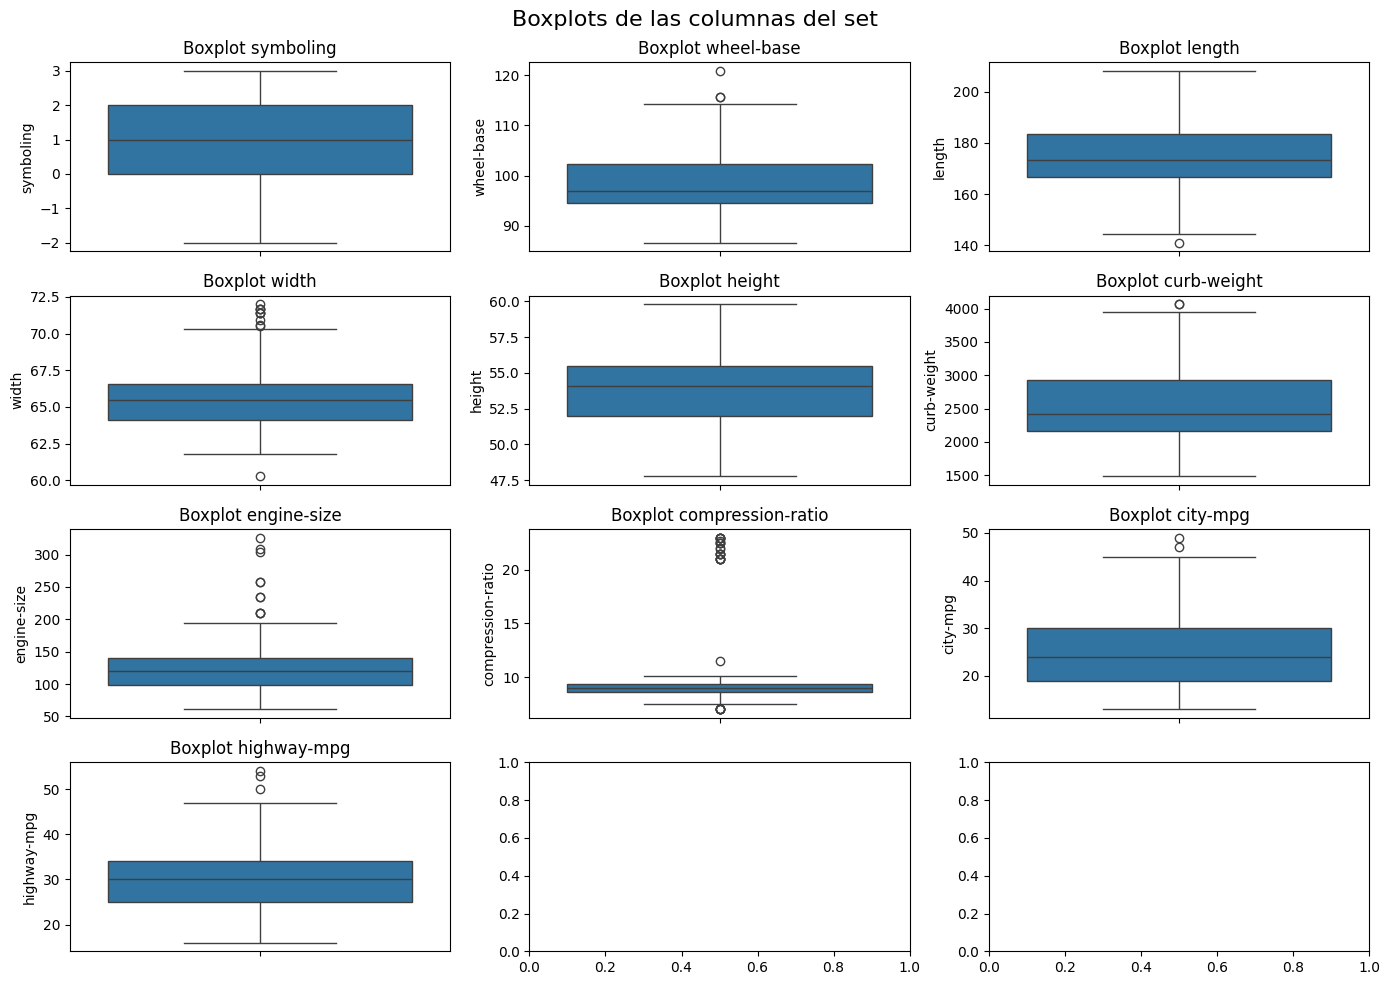

In [22]:
from utils import graph_boxplot
graph_boxplot(df, get_numeric_columns(df), title="Boxplots de las columnas del set")

Ahora veremos el análisis y correlación entre variables

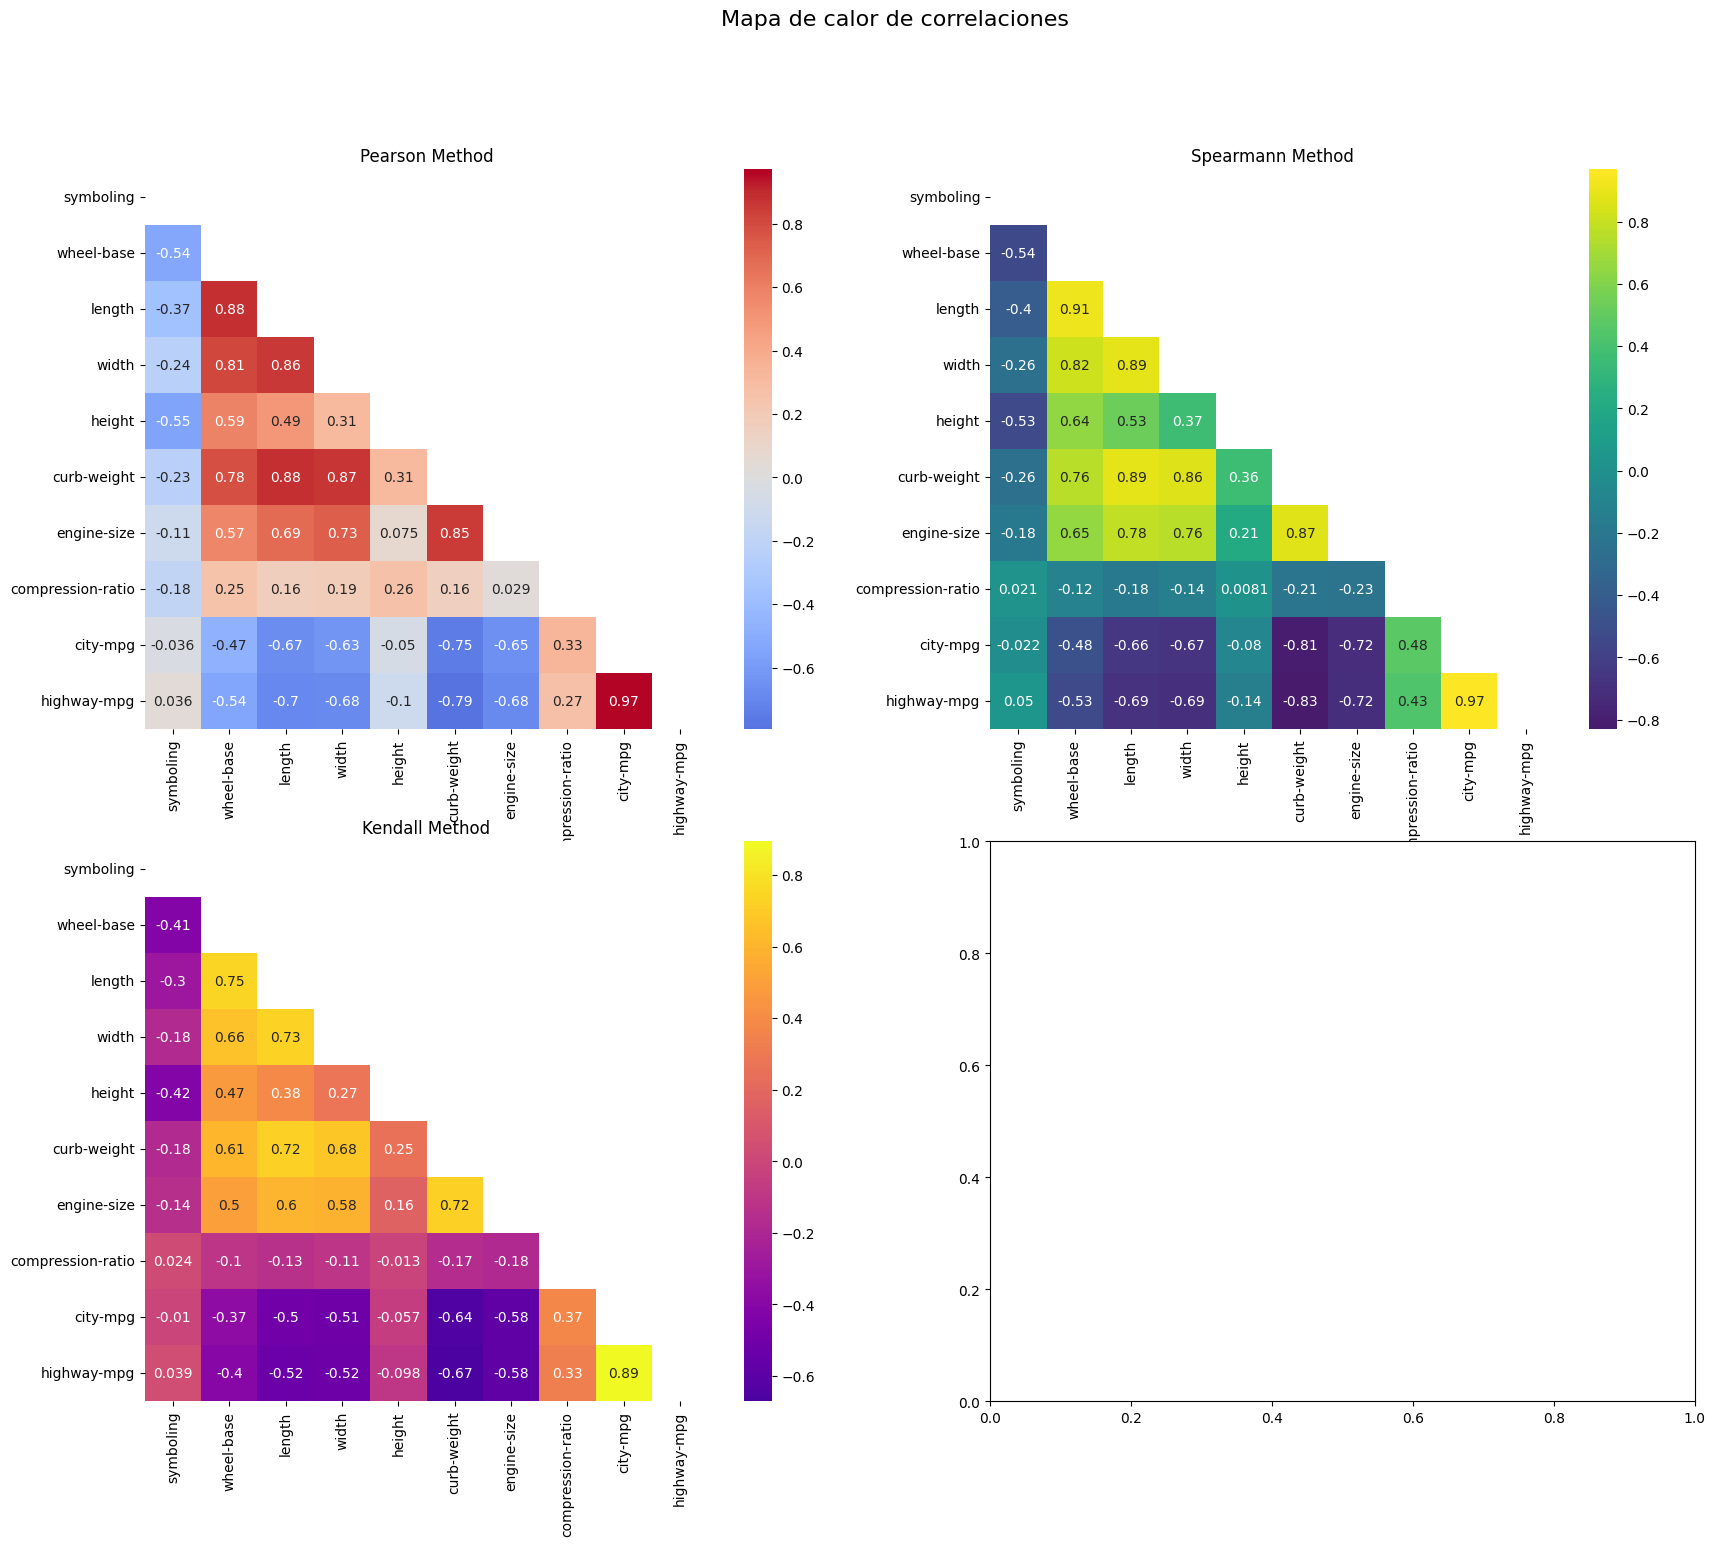

In [23]:
from utils import graph_correlations
correlation_matrix = df[get_numeric_columns(df)].corr(method='pearson')
spearman_corr = df[get_numeric_columns(df)].corr(method='spearman')
kendall_corr = df[get_numeric_columns(df)].corr(method='kendall')
graph_correlations(correlation_matrix, spearman_corr, kendall_corr, title="Mapa de calor de correlaciones", figsize=(20, 16))


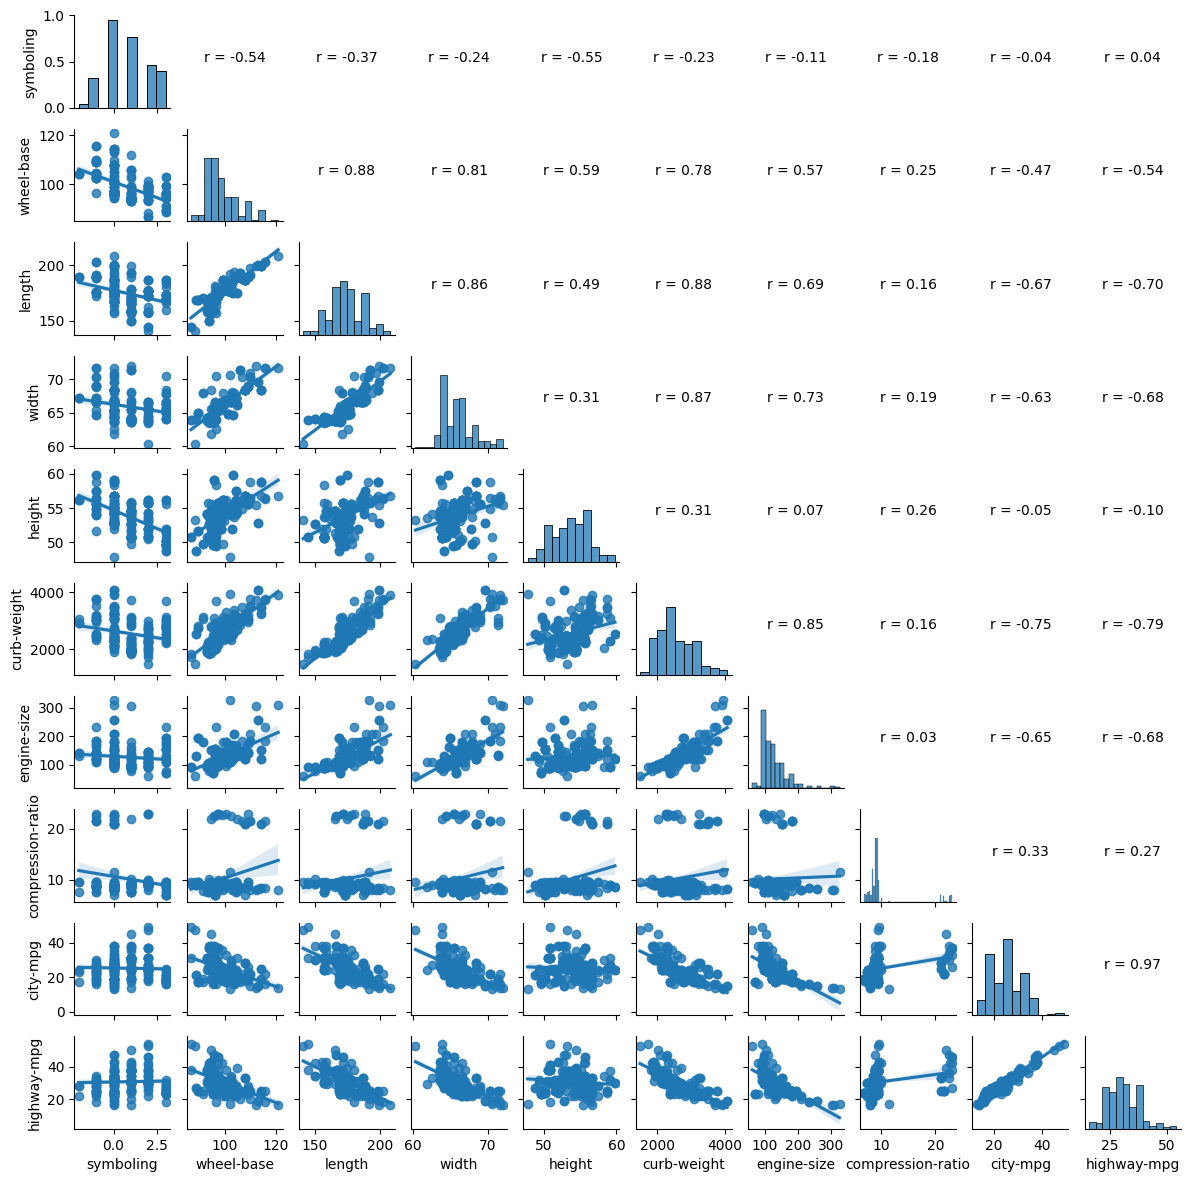

In [24]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
palette = sns.color_palette("Spectral")
g = sns.PairGrid(df, height=1.2)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
plt.show()

## Preparamos los datos para crear el modelo

In [25]:
from sklearn.model_selection import train_test_split
important_columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']

X = df[important_columns]
y = df['price']

In [26]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 6498761.548780488
R-cuadrado: 0.9468824441786604


In [28]:
# Entrenamiento del modelo con poda
tree_pruned = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_pruned.fit(X_train, y_train)

# Realizar predicciones
y_pred_pruned = tree_pruned.predict(X_test)

# Evaluar el modelo podado
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Error Cuadrático Medio (Podado): 11044116.113269828
R-cuadrado (Podado): 0.9097310387924528
